# Burnout en empleados corporativos
## Aprendizaje de Máquina - TP FINAL

---
## Desarrollo del modelos de árboles
---

#### Carga de datos

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc, RocCurveDisplay,
    classification_report
)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [10]:
# Cargar de los datasets
X_train = pd.read_csv("output/burnout_X_train.csv")
y_train = pd.read_csv("output/burnout_y_train.csv")
X_test = pd.read_csv("output/burnout_X_test.csv")
y_test = pd.read_csv("output/burnout_y_test.csv")
X_train_PCA = pd.read_csv("output/burnout_X_train_PCA.csv")
X_test_PCA = pd.read_csv("output/burnout_X_test_PCA.csv")

In [30]:
y_train = y_train.iloc[:, 0]
y_test = y_test.iloc[:, 0]

In [11]:
#check unique values in y_train
print(y_train['BurnRate_Class'].unique())

[1. 0. 2.]


In [ ]:
# 3. Escalado 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA ya esta escalado, por lo que no es necesario escalarlo nuevamente

In [65]:
# Mapeo de clases a etiquetas para mejor representación
class_mapping = {
    0.0: 'Bajo',
    1.0: 'Medio',
    2.0: 'Alto'
}

In [47]:
# Definir modelos de árboles a probar
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

In [49]:
# Para guardar resultados y graficar después
cms = {}
roc_data = {}  # Listas de (fpr, tpr, auc, clase) por modelo

cms_PCA = {}
roc_data_PCA = {}  # Listas de (fpr, tpr, auc, clase) por modelo en PCA

classification_reports = {}


In [50]:
print("--- Entrenamiento y evaluación en Regular Data ---")
for name, model in models.items():
    print(f'\n--- Modelo: {name} (Regular Data) ---')
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Guardar el reporte de clasificación
    report = classification_report(y_test, y_pred, output_dict=True)
    classification_reports[f'{name}_Regular'] = report
    print(classification_report(y_test, y_pred))
    
    # almacenar la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    cms[f'{name}_Regular'] = (cm, model.classes_)
    
    # Almacenar las curvas ROC
    y_test_bin = label_binarize(y_test, classes=model.classes_)
    n_classes = y_test_bin.shape[1]
    y_score = model.predict_proba(X_test_scaled)
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    roc_data[f'{name}_Regular'] = (fpr, tpr, roc_auc, model.classes_)

--- Entrenamiento y evaluación en Regular Data ---

--- Modelo: Decision Tree (Regular Data) ---
              precision    recall  f1-score   support

         0.0       0.84      0.83      0.84      1136
         1.0       0.84      0.85      0.85      2514
         2.0       0.69      0.68      0.68       637

    accuracy                           0.82      4287
   macro avg       0.79      0.79      0.79      4287
weighted avg       0.82      0.82      0.82      4287


--- Modelo: Random Forest (Regular Data) ---
              precision    recall  f1-score   support

         0.0       0.90      0.85      0.88      1136
         1.0       0.87      0.92      0.89      2514
         2.0       0.82      0.70      0.75       637

    accuracy                           0.87      4287
   macro avg       0.86      0.82      0.84      4287
weighted avg       0.87      0.87      0.87      4287


--- Modelo: Gradient Boosting (Regular Data) ---
              precision    recall  f1-score  

In [51]:
print("\n--- Entrenamiento utilizando PCA ---")
for name, model in models.items():
    print(f'\n--- Modelo: {name} (PCA Data) ---')
    
    model.fit(X_train_PCA, y_train)
    y_pred_pca = model.predict(X_test_PCA)
    
    # Guardar el reporte de clasificación
    report_pca = classification_report(y_test, y_pred_pca, output_dict=True)
    classification_reports[f'{name}_PCA'] = report_pca
    print(classification_report(y_test, y_pred_pca))
    
    # almacenar la matriz de confusión
    cm_pca = confusion_matrix(y_test, y_pred_pca)
    cms[f'{name}_PCA'] = (cm_pca, model.classes_)
    
    # Almacenar las curvas ROC
    y_test_bin_pca = label_binarize(y_test, classes=model.classes_)
    n_classes_pca = y_test_bin_pca.shape[1]
    y_score_pca = model.predict_proba(X_test_PCA)
    
    fpr_pca = dict()
    tpr_pca = dict()
    roc_auc_pca = dict()
    for i in range(n_classes_pca):
        fpr_pca[i], tpr_pca[i], _ = roc_curve(y_test_bin_pca[:, i], y_score_pca[:, i])
        roc_auc_pca[i] = auc(fpr_pca[i], tpr_pca[i])
    roc_data[f'{name}_PCA'] = (fpr_pca, tpr_pca, roc_auc_pca, model.classes_)



--- Entrenamiento utilizando PCA ---

--- Modelo: Decision Tree (PCA Data) ---
              precision    recall  f1-score   support

         0.0       0.80      0.81      0.81      1136
         1.0       0.82      0.80      0.81      2514
         2.0       0.60      0.64      0.62       637

    accuracy                           0.78      4287
   macro avg       0.74      0.75      0.75      4287
weighted avg       0.78      0.78      0.78      4287


--- Modelo: Random Forest (PCA Data) ---
              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85      1136
         1.0       0.85      0.89      0.87      2514
         2.0       0.77      0.65      0.71       637

    accuracy                           0.84      4287
   macro avg       0.82      0.79      0.81      4287
weighted avg       0.84      0.84      0.84      4287


--- Modelo: Gradient Boosting (PCA Data) ---
              precision    recall  f1-score   support

         0.0   

In [52]:
print("\n--- Comparación de los reportes de clasificación ---")
metrics_to_display = ['precision', 'recall', 'f1-score', 'support'] # Metrics within each class/average
overall_metrics = ['accuracy', 'macro avg', 'weighted avg'] # Overall averages

for name in models.keys():
    print(f"\nModelo: {name}")
    print("=" * 70) # Separator for models

    regular_report = classification_reports[f'{name}_Regular']
    pca_report = classification_reports[f'{name}_PCA']

    # Prepare data for a DataFrame
    data = []
    index = []

    # Handle overall metrics first
    for metric_type in overall_metrics:
        if metric_type == 'accuracy':
            data.append([regular_report.get('accuracy', np.nan), pca_report.get('accuracy', np.nan)])
            index.append(f'Accuracy')
        else: # For 'macro avg' and 'weighted avg'
            for sub_metric in metrics_to_display:
                reg_val = regular_report.get(metric_type, {}).get(sub_metric, np.nan)
                pca_val = pca_report.get(metric_type, {}).get(sub_metric, np.nan)
                data.append([reg_val, pca_val])
                index.append(f'{metric_type.replace("_", " ").capitalize()} {sub_metric}')

    # Handle individual class metrics
    # Get all class labels (e.g., '0', '1', '2')
    class_labels = sorted([k for k in regular_report.keys() if k.isdigit()], key=int)
    for class_label in class_labels:
        for sub_metric in metrics_to_display:
            reg_val = regular_report.get(class_label, {}).get(sub_metric, np.nan)
            pca_val = pca_report.get(class_label, {}).get(sub_metric, np.nan)
            data.append([reg_val, pca_val])
            index.append(f'Clase {class_label} {sub_metric}')


    df = pd.DataFrame(data, index=index, columns=['Regular Data', 'PCA Data'])
    # Optional: Format numerical columns for better readability
    df = df.round(4) # Round to 4 decimal places
    print(df.to_string()) # Use to_string() for full table without truncation
    print("=" * 70) # Separator for end of model report


--- Comparación de los reportes de clasificación ---

Modelo: Decision Tree
                        Regular Data   PCA Data
Accuracy                      0.8202     0.7814
Macro avg precision           0.7901     0.7422
Macro avg recall              0.7878     0.7512
Macro avg f1-score            0.7890     0.7465
Macro avg support          4287.0000  4287.0000
Weighted avg precision        0.8200     0.7834
Weighted avg recall           0.8202     0.7814
Weighted avg f1-score         0.8200     0.7823
Weighted avg support       4287.0000  4287.0000

Modelo: Random Forest
                        Regular Data   PCA Data
Accuracy                      0.8691     0.8390
Macro avg precision           0.8628     0.8239
Macro avg recall              0.8233     0.7928
Macro avg f1-score            0.8408     0.8066
Macro avg support          4287.0000  4287.0000
Weighted avg precision        0.8686     0.8374
Weighted avg recall           0.8691     0.8390
Weighted avg f1-score         0.8675

Modelo: Decision Tree, cm_regular: [[ 948  188    0]
 [ 180 2135  199]
 [   0  204  433]]
Modelo: Decision Tree, cm_pca: [[ 920  215    1]
 [ 223 2023  268]
 [   0  230  407]]
Modelo: Random Forest, cm_regular: [[ 971  165    0]
 [ 105 2312   97]
 [   0  194  443]]
Modelo: Random Forest, cm_pca: [[ 951  185    0]
 [ 160 2229  125]
 [   0  220  417]]
Modelo: Gradient Boosting, cm_regular: [[ 958  178    0]
 [  90 2337   87]
 [   0  191  446]]
Modelo: Gradient Boosting, cm_pca: [[ 962  174    0]
 [ 168 2222  124]
 [   0  215  422]]


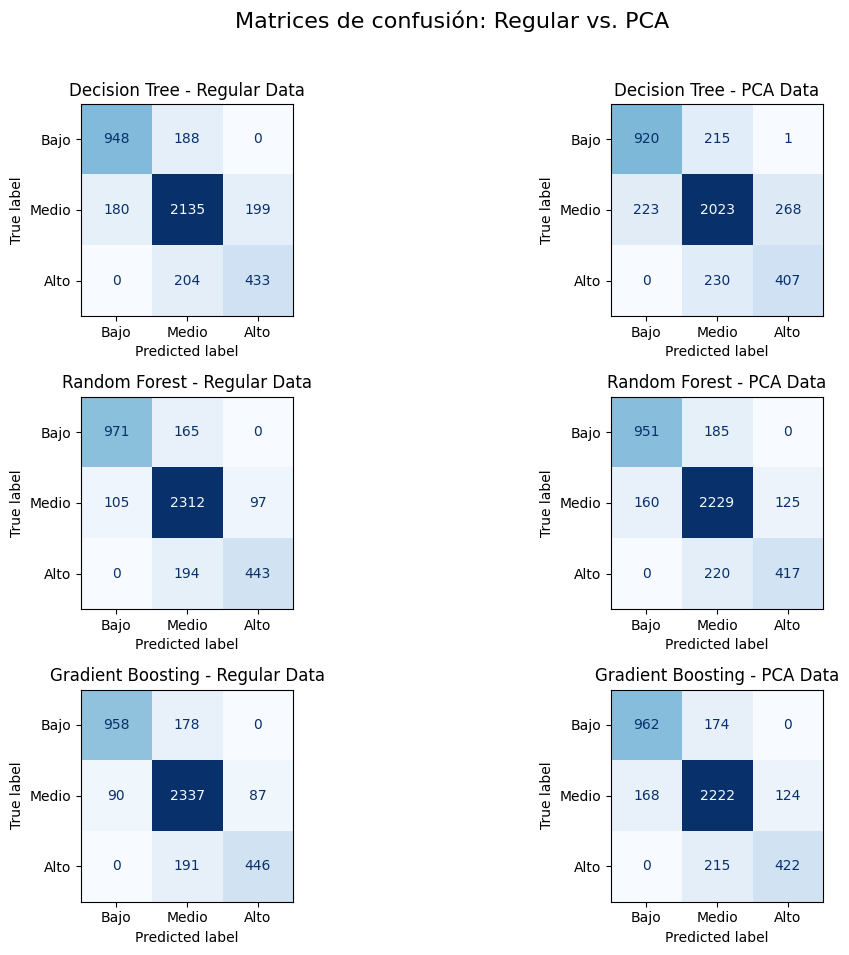

In [73]:
# Comparación entre las matrices de confusion
fig_cm, axes_cm = plt.subplots(3, 2, figsize=(12, 10))
fig_cm.suptitle('Matrices de confusión: Regular vs. PCA', fontsize=16)

row = 0
for name in models.keys():
    # Primero con los datos regulares


    cm_regular, classes_regular = cms[f'{name}_Regular'] 
    display_labels_regular = [class_mapping[c] for c in classes_regular] 
    print(f"Modelo: {name}, cm_regular: {cm_regular}")
    disp_regular = ConfusionMatrixDisplay(confusion_matrix=cm_regular, display_labels=display_labels_regular)
    disp_regular.plot(ax=axes_cm[row, 0], cmap=plt.cm.Blues, colorbar=False)
    axes_cm[row, 0].set_title(f'{name} - Regular Data')
    axes_cm[row, 0].grid(False)

    # Se repite ahora pero para PCA Data
    cm_pca, classes_pca = cms[f'{name}_PCA'] 
    display_labels_pca = [class_mapping[c] for c in classes_pca] 
    print(f"Modelo: {name}, cm_pca: {cm_pca}")
    disp_pca = ConfusionMatrixDisplay(confusion_matrix=cm_pca, display_labels=display_labels_pca)
    disp_pca.plot(ax=axes_cm[row, 1], cmap=plt.cm.Blues, colorbar=False)
    axes_cm[row, 1].set_title(f'{name} - PCA Data')
    axes_cm[row, 1].grid(False)

    row += 1

plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

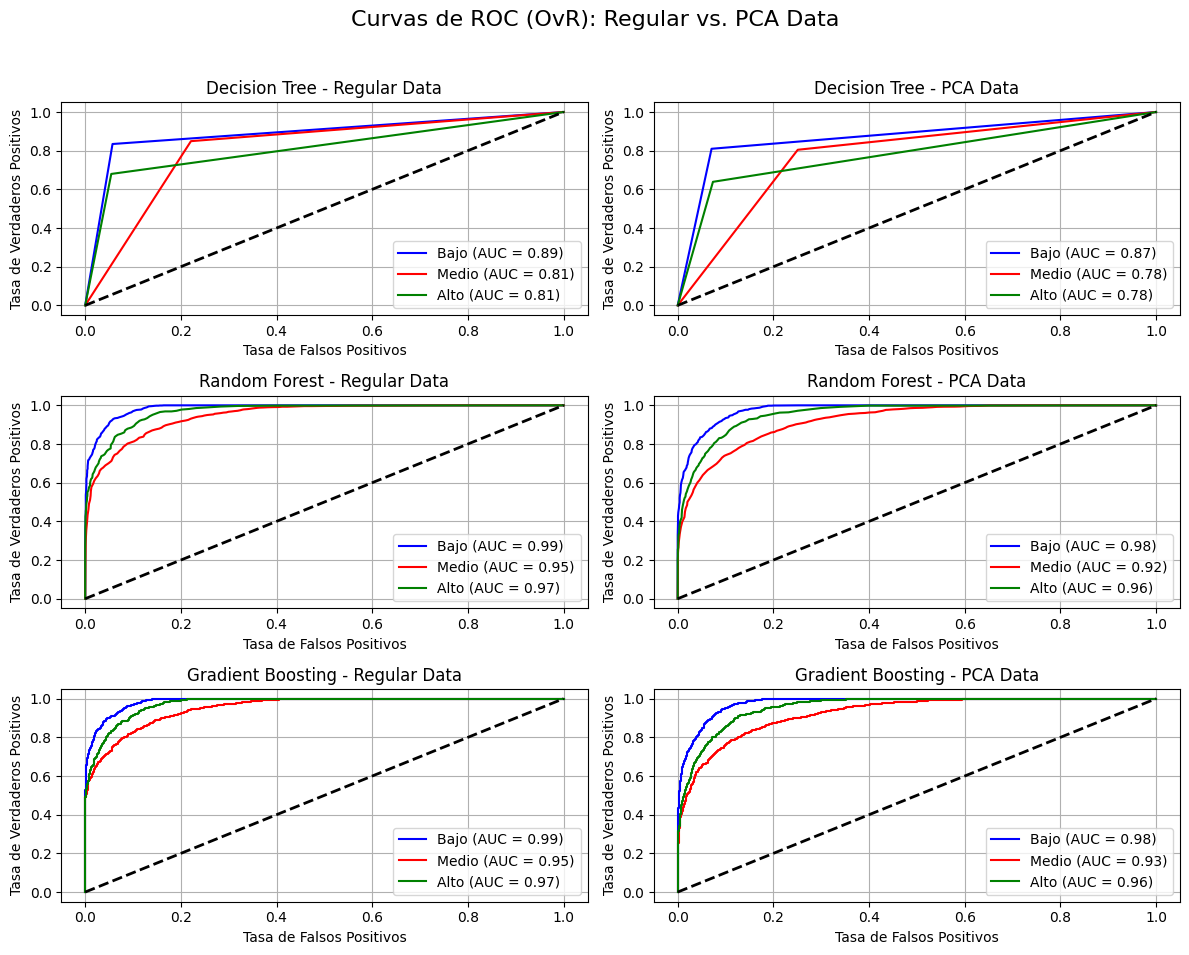

In [64]:
# Comparacion lado a lado de las curvas ROC
fig_roc, axes_roc = plt.subplots(3, 2, figsize=(12, 10))
fig_roc.suptitle('Curvas de ROC (OvR): Regular vs. PCA Data', fontsize=16)

colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown'] 

row = 0
for name in models.keys():
    # Regular Data ROC
    fpr_reg, tpr_reg, roc_auc_reg, classes_reg = roc_data[f'{name}_Regular']
    ax_reg = axes_roc[row, 0]
    for j, color in zip(range(len(classes_reg)), colors):
        # Use the class_mapping here for the label
        class_label_str = class_mapping[classes_reg[j]]
        ax_reg.plot(fpr_reg[j], tpr_reg[j], color=color,
                    label=f'{class_label_str} (AUC = {roc_auc_reg[j]:.2f})')
    ax_reg.plot([0, 1], [0, 1], 'k--', lw=2)
    ax_reg.set_xlabel('Tasa de Falsos Positivos')
    ax_reg.set_ylabel('Tasa de Verdaderos Positivos')
    ax_reg.set_title(f'{name} - Regular Data')
    ax_reg.legend(loc='lower right')
    ax_reg.grid(True)

    # PCA Data ROC
    fpr_pca, tpr_pca, roc_auc_pca, classes_pca = roc_data[f'{name}_PCA']
    ax_pca = axes_roc[row, 1]
    for j, color in zip(range(len(classes_pca)), colors):
        # Use the class_mapping here for the label
        class_label_str = class_mapping[classes_pca[j]]
        ax_pca.plot(fpr_pca[j], tpr_pca[j], color=color,
                    label=f'{class_label_str} (AUC = {roc_auc_pca[j]:.2f})')
    ax_pca.plot([0, 1], [0, 1], 'k--', lw=2)
    ax_pca.set_xlabel('Tasa de Falsos Positivos')
    ax_pca.set_ylabel('Tasa de Verdaderos Positivos')
    ax_pca.set_title(f'{name} - PCA Data')
    ax_pca.legend(loc='lower right')
    ax_pca.grid(True)

    row += 1

plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

## Conclusiones: Impacto de PCA en Modelos de Árbol

### Contexto General

Al evaluar los modelos basados en árboles (Árbol de Decisión, Random Forest y Gradient Boosting) con datos originales y con datos reducidos por PCA, se observan diferencias en el rendimiento de clasificación y en la eficiencia computacional.

Si bien los modelos de árbol como Random Forest y Gradient Boosting toleran bien conjuntos de datos con muchas variables, se optó por aplicar PCA con el objetivo de evaluar empíricamente su impacto en el rendimiento. Esto permitió contrastar los beneficios potenciales de la reducción de dimensionalidad frente a los riesgos de pérdida de información relevante

### Rendimiento de Clasificación



#### **Árbol de Decisión (Decision Tree)**



* Para el Árbol de Decisión, el uso de **PCA resulta en una disminución notable** en todas las métricas de clasificación (aproximadamente un 3-5% en precisión, recall, F1-score y accuracy). Esto sugiere que la reducción de dimensionalidad con PCA, aunque simplifica los datos, causa una pérdida de información crítica que el Árbol de Decisión utiliza para construir sus reglas de decisión, impactando negativamente su rendimiento.

#### **Random Forest**


* Similar al Árbol de Decisión, Random Forest también experimenta una **disminución en su rendimiento de clasificación** cuando se utilizan datos PCA (alrededor de un 3% en las métricas clave). Aunque Random Forest es más robusto a la variabilidad que un solo árbol, la pérdida de algunas características originales tras PCA sigue impactando su capacidad para construir un conjunto de árboles óptimo.

#### **Gradient Boosting**


* Gradient Boosting, al igual que los otros modelos de ensamble, muestra una **baja en su rendimiento** al aplicar PCA (aproximadamente un 3-4% en las métricas principales). A pesar de su naturaleza iterativa y de mejora continua, la transformación PCA parece eliminar aspectos de los datos que son cruciales para que el modelo logre su máximo potencial de clasificación.

---

### Matrices de Confusión

Las matrices de confusión reflejan visualmente esta disminución en el rendimiento. 
* **Decision Tree:**
    Se observa una reducción en los verdaderos positivos para la clase 0.0 (948 vs 920) y 1.0 (2135 vs 2023), y un aumento en los falsos positivos/negativos, confirmando la caída en el rendimiento.

* **Random Forest:**
    Similar al Árbol de Decisión, hay una ligera reducción en los verdaderos positivos (ej. 2312 vs 2229 para la clase 1.0) y un aumento de errores.

* **Gradient Boosting:**
    También se aprecia un patrón de rendimiento ligeramente inferior con PCA, con más errores de clasificación en general.

---

### Conclusión General para Modelos de Árbol

En contraste con los modelos SVM, para los modelos basados en árboles (Árbol de Decisión, Random Forest, Gradient Boosting), **PCA no es beneficioso en términos de rendimiento de clasificación**. La reducción de dimensionalidad parece llevar a una pérdida de información importante que estos modelos utilizan para alcanzar su máxima capacidad predictiva, resultando en métricas de precisión, recall, F1-score y accuracy consistentemente más bajas.

